# pandas:

- Creating a series
- Creating a DataFrame
- Accessing a value,index
- Masking
- isnull,notnull
- counting missing values


In [1]:
import pandas as pd
d = {"names":["a","b","c"],"marks":[23,45,24],"grades":["A+","B","C"]}
df = pd.DataFrame(d)
df

,names,marks,grades
0,a,23,A+
1,b,45,B
2,c,24,C


In [3]:
df["subject"]=["python","django","ml"]
df

,names,marks,grades,subject
0,a,23,A+,python
1,b,45,B,django
2,c,24,C,ml


### loc and iloc

- The difference between loc and iloc is loc gets rows or columns with particular lables from the index.

- iloc gets rows or columns at particular positions in the index(it takes only integers).


In [4]:
df.index=["srm","vemu","svcet"]
df

,names,marks,grades,subject
srm,a,23,A+,python
vemu,b,45,B,django
svcet,c,24,C,ml


In [5]:
df.loc["vemu",["subject"]]

subject    django
Name: vemu, dtype: object

In [6]:
df.iloc[1,3]

'django'

In [7]:
df.iloc[1]

names           b
marks          45
grades          B
subject    django
Name: vemu, dtype: object

[datatypes](https://docs.google.com/spreadsheets/d/1etk2n0dKbvzPPyrmcpatCnNj69gTbscOZkc7TKm4tDc/edit#gid=0)

## Arithematic and DataAlignment

In [8]:
s1 = pd.Series([7.3,-2.5,3.4,1.5],index=["a","c","d","e"])
s2 = pd.Series([-2.1,3.6,-1.5,4,3.1],index=["a","c","e","f","g"])

In [9]:
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [10]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [11]:
s1+s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [16]:
s1.add(s2,fill_value=0)

a    5.2
c    1.1
d    3.4
e    0.0
f    4.0
g    3.1
dtype: float64

In [17]:
import numpy as np
arr = np.array([1,2,3,np.nan])
ds = pd.Series(arr)
ds

0    1.0
1    2.0
2    3.0
3    NaN
dtype: float64

In [19]:
ds.fillna("srm")

0      1
1      2
2      3
3    srm
dtype: object

### Deleting

In [20]:
df

,names,marks,grades,subject
srm,a,23,A+,python
vemu,b,45,B,django
svcet,c,24,C,ml


In [23]:
#drop
df1 = df.drop("vemu")
df1

,names,marks,grades,subject
srm,a,23,A+,python
svcet,c,24,C,ml


In [22]:
df

,names,marks,grades,subject
srm,a,23,A+,python
vemu,b,45,B,django
svcet,c,24,C,ml


In [24]:
df1

,names,marks,grades,subject
srm,a,23,A+,python
svcet,c,24,C,ml


In [25]:
df

,names,marks,grades,subject
srm,a,23,A+,python
vemu,b,45,B,django
svcet,c,24,C,ml


In [26]:
df.loc["vemu",["names"]]=np.nan
df

,names,marks,grades,subject
srm,a,23,A+,python
vemu,NaN,45,B,django
svcet,c,24,C,ml


In [27]:
df.dropna()

,names,marks,grades,subject
srm,a,23,A+,python
svcet,c,24,C,ml


In [28]:
df.describe()

,marks
count,3.000000
mean,30.666667
std,12.423097
min,23.000000
25%,23.500000
50%,24.000000
75%,34.500000
max,45.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, srm to svcet
Data columns (total 4 columns):
names      2 non-null object
marks      3 non-null int64
grades     3 non-null object
subject    3 non-null object
dtypes: int64(1), object(3)
memory usage: 200.0+ bytes


In [30]:
df

,names,marks,grades,subject
srm,a,23,A+,python
vemu,NaN,45,B,django
svcet,c,24,C,ml


In [31]:
df

,names,marks,grades,subject
srm,a,23,A+,python
vemu,NaN,45,B,django
svcet,c,24,C,ml


In [32]:
# sorting
df.sort_index()

,names,marks,grades,subject
srm,a,23,A+,python
svcet,c,24,C,ml
vemu,NaN,45,B,django


In [33]:
df.sort_index(axis=1)

,grades,marks,names,subject
srm,A+,23,a,python
vemu,B,45,NaN,django
svcet,C,24,c,ml


In [35]:
#rank
df.sort_index(axis=1).rank(axis=0)

,grades,marks,names,subject
srm,1.0,1.0,1.0,3.0
vemu,2.0,3.0,NaN,1.0
svcet,3.0,2.0,2.0,2.0


In [36]:
df.rank()

,names,marks,grades,subject
srm,1.0,1.0,1.0,3.0
vemu,NaN,3.0,2.0,1.0
svcet,2.0,2.0,3.0,2.0


### Groupby

In [37]:
df1 = pd.DataFrame({"c1":["a","b","a","b","a","a","a"],
                    "c2":["one","two","three","one","three","two","three"],
                   "c3":np.random.randn(7),"c4":np.random.randn(7)})
df1

,c1,c2,c3,c4
0,a,one,-1.715385,0.447641
1,b,two,-0.431067,-0.637242
2,a,three,0.205953,-0.619685
3,b,one,1.466205,-0.447374
4,a,three,-1.574625,1.162160
5,a,two,-1.416291,-0.717558
6,a,three,-1.232664,1.562263


In [39]:
df1.groupby(["c1"]).sum()

,c3,c4
c1,,
a,-5.733013,1.834822
b,1.035138,-1.084616


In [40]:
df1.groupby(["c1","c2"]).sum()

c3        c4
c1 c2                       
a  one   -1.715385  0.447641
   three -2.601336  2.104739
   two   -1.416291 -0.717558
b  one    1.466205 -0.447374
   two   -0.431067 -0.637242

In [41]:
df1.groupby(["c1","c2"]).first()

c3        c4
c1 c2                       
a  one   -1.715385  0.447641
   three  0.205953 -0.619685
   two   -1.416291 -0.717558
b  one    1.466205 -0.447374
   two   -0.431067 -0.637242

In [43]:
df1.groupby(["c1","c2"]).last()

c3        c4
c1 c2                       
a  one   -1.715385  0.447641
   three -1.232664  1.562263
   two   -1.416291 -0.717558
b  one    1.466205 -0.447374
   two   -0.431067 -0.637242

In [44]:

df1

,c1,c2,c3,c4
0,a,one,-1.715385,0.447641
1,b,two,-0.431067,-0.637242
2,a,three,0.205953,-0.619685
3,b,one,1.466205,-0.447374
4,a,three,-1.574625,1.162160
5,a,two,-1.416291,-0.717558
6,a,three,-1.232664,1.562263


- pandas dataset formats

[dataset formats](https://drive.google.com/file/d/1jt_pqd-FDzfQ5v_0x6Bp8nYhcj2n1RfN/view)

- titanic data set

[titanic data set](https://drive.google.com/file/d/1G2AtPjofZPGEyQox4GJ29b070VcxKN2x/view?usp=sharing)

In [46]:
data = pd.read_csv("titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [48]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [72]:
data.loc[1,"Pclass"]

1

In [74]:
data.iloc[5,6]

0

In [51]:
data.tail(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [52]:
data.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
396,397,0,3,"Olsson, Miss. Elina",female,31.0,0,0,350407,7.8542,NaN,S
613,614,0,3,"Horgan, Mr. John",male,NaN,0,0,370377,7.7500,NaN,Q


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [54]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [58]:
data1 = pd.read_table("sampletext.txt")
data1

C:\Users\Alekhya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


,"a,b"
0,"1,2"
1,"2,3"
2,"4,5"
3,"4,6"


In [59]:
data2 = pd.read_table("sampletext.txt",sep=",")
data2

C:\Users\Alekhya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


,a,b
0,1,2
1,2,3
2,4,5
3,4,6


[exceldata](https://drive.google.com/file/d/1-gcDidfNLzjn0lx2GTESvs3QzBykL64S/view?usp=sharing)

In [62]:
data1 = pd.read_excel("Book1.xlsx")
data1

,Name,Branch,College
0,a,cse,srm
1,b,ece,srm
2,c,eee,srm
3,d,it,srm
4,e,cse,srm
5,f,eee,srm
6,g,ece,srm
7,h,ece,srm
8,i,cse,srm
9,j,it,srm


In [67]:
data1.loc[4,"Name"]

'e'

# Matplotlib

- plotting and visualization

In [75]:
import matplotlib.pyplot as pl

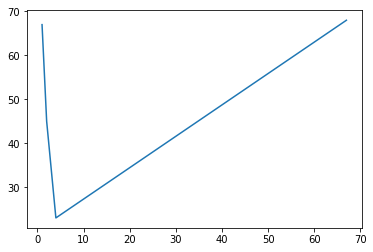

In [77]:
x = [1,2,4,67]
y = [67,45,23,68]
pl.plot(x,y)

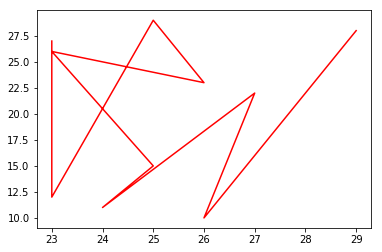

In [78]:
nx = np.random.randint(20,30,10)
ny = np.random.randint(10,30,10)
pl.plot(nx,ny,"r")

[colors](https://matplotlib.org/tutorials/colors/colors.html#sphx-glr-tutorials-colors-colors-py)

[markers](https://matplotlib.org/3.1.1/api/markers_api.html)

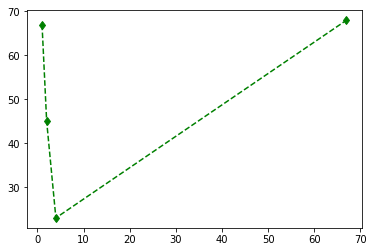

In [80]:
pl.plot(x,y,"gd--")

### xlabel,ylabel,title

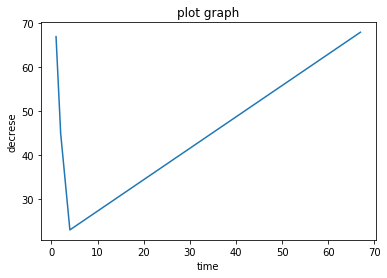

In [81]:
x = [1,2,4,67]
y = [67,45,23,68]
pl.plot(x,y)
pl.xlabel("time")
pl.ylabel("decrese")
pl.title("plot graph")
pl.show()

In [82]:
from matplotlib import style
pl.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

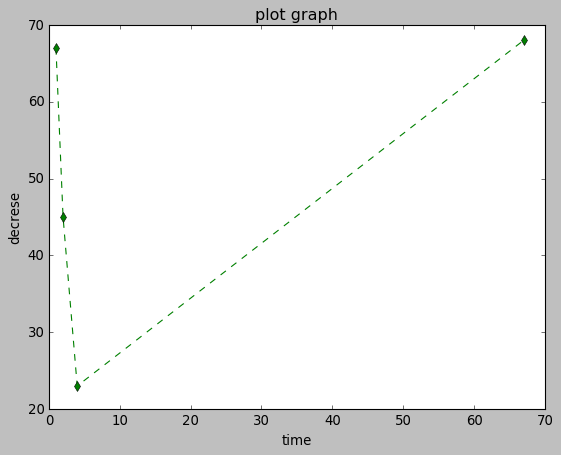

In [85]:
style.use('classic')
x = [1,2,4,67]
y = [67,45,23,68]
pl.plot(x,y,"gd--")
pl.xlabel("time")
pl.ylabel("decrese")
pl.title("plot graph")
pl.show()

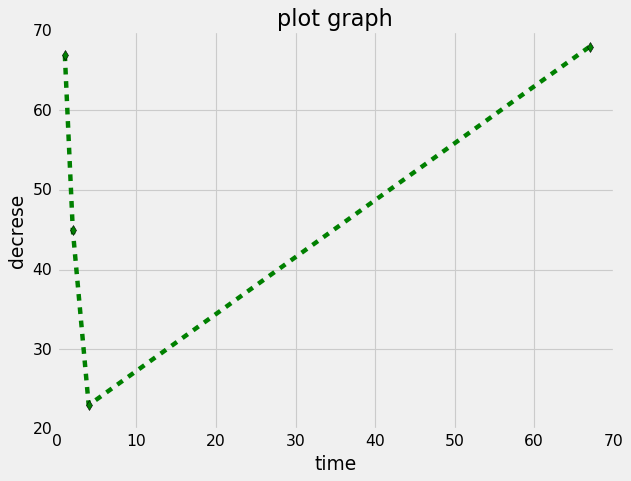

In [86]:
style.use('fivethirtyeight')
x = [1,2,4,67]
y = [67,45,23,68]
pl.plot(x,y,"gd--")
pl.xlabel("time")
pl.ylabel("decrese")
pl.title("plot graph")
pl.show()

# Hist

(array([11.,  6., 12., 13.,  5.,  6., 17., 10.,  9., 11.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <a list of 10 Patch objects>)

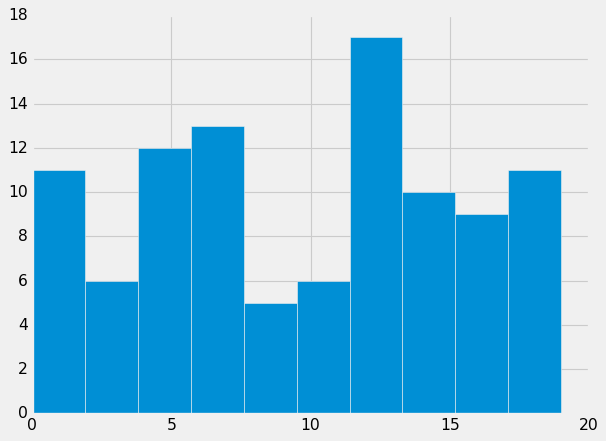

In [87]:
marks = np.random.randint(0,20,100)
pl.hist(marks)

In [88]:
marks

array([15, 13, 13, 15, 19,  1, 10,  3,  1,  6, 11, 16,  2, 18,  6, 15, 11,
        0,  7,  6,  6,  8, 14,  1,  4, 12, 13, 12, 12,  6,  4,  8, 15,  4,
       19,  4,  7, 12, 13, 17, 16, 19,  1,  1, 19,  7, 12,  1,  5, 17,  1,
       19,  0, 13, 12, 19, 19, 14,  2,  5,  7,  8, 13, 16,  5, 13,  6, 13,
       19,  6,  9, 15,  5,  4, 18, 10, 13, 14,  5, 17,  9,  4,  6, 17,  1,
        3, 19, 11, 15,  3,  2, 10,  1, 13,  4, 13,  6, 17, 17, 15])

(array([11.,  6., 12., 13.,  5.,  6., 17., 10.,  9., 11.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <a list of 10 Patch objects>)

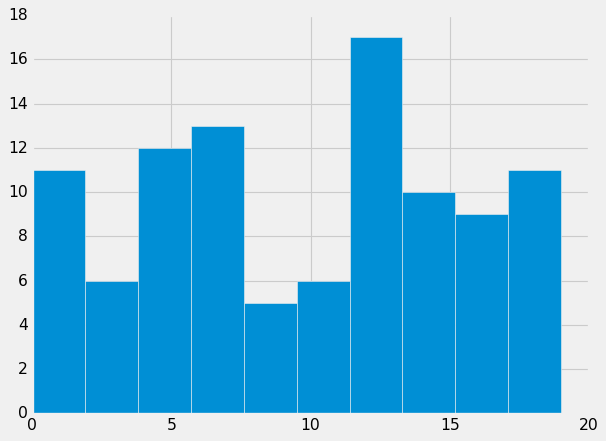

In [89]:
pl.hist(marks,bins=10)

# Bar plot

In [90]:
marks

array([15, 13, 13, 15, 19,  1, 10,  3,  1,  6, 11, 16,  2, 18,  6, 15, 11,
        0,  7,  6,  6,  8, 14,  1,  4, 12, 13, 12, 12,  6,  4,  8, 15,  4,
       19,  4,  7, 12, 13, 17, 16, 19,  1,  1, 19,  7, 12,  1,  5, 17,  1,
       19,  0, 13, 12, 19, 19, 14,  2,  5,  7,  8, 13, 16,  5, 13,  6, 13,
       19,  6,  9, 15,  5,  4, 18, 10, 13, 14,  5, 17,  9,  4,  6, 17,  1,
        3, 19, 11, 15,  3,  2, 10,  1, 13,  4, 13,  6, 17, 17, 15])

In [91]:
pass_marks=marks>10
fail_marks=marks<=10

In [92]:
marks = pd.Series(marks)
marks[pass_marks]="pass"
marks[fail_marks]="fail"
marks

0     pass
1     pass
2     pass
3     pass
4     pass
5     fail
6     fail
7     fail
8     fail
9     fail
10    pass
11    pass
12    fail
13    pass
14    fail
15    pass
16    pass
17    fail
18    fail
19    fail
20    fail
21    fail
22    pass
23    fail
24    fail
25    pass
26    pass
27    pass
28    pass
29    fail
      ... 
70    fail
71    pass
72    fail
73    fail
74    pass
75    fail
76    pass
77    pass
78    fail
79    pass
80    fail
81    fail
82    fail
83    pass
84    fail
85    fail
86    pass
87    pass
88    pass
89    fail
90    fail
91    fail
92    fail
93    pass
94    fail
95    pass
96    fail
97    pass
98    pass
99    pass
Length: 100, dtype: object

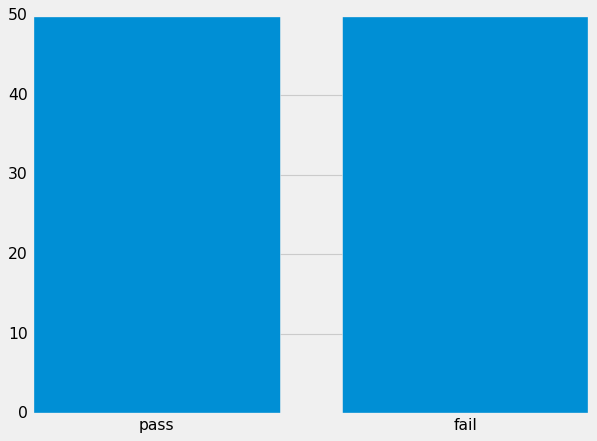

In [95]:
pl.bar(["pass","fail"],marks.value_counts())
pl.show()

In [96]:
marks.value_counts()

fail    50
pass    50
dtype: int64